In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')




In [4]:
df=pd.read_csv('shopping_behavior_updated (1).csv')

In [5]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [6]:
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [10]:
df.shape

(3900, 18)

In [11]:
df1 = df.isnull().sum()


print("Null Values Count for Each Column:")
print(df1)

Null Values Count for Each Column:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [12]:
df1

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [13]:
df.drop('Location', axis=1, inplace=True)

# Display the modified DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD) Size      Color  Season  Review Rating  \
0                        53    L       Gray  Winter            3.1   
1                        64    L     Maroon  Winter            3.1   
2                        73    S     Maroon  

In [14]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


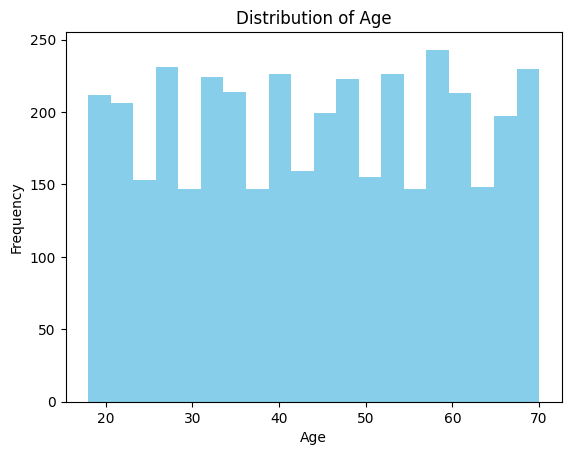

In [15]:
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




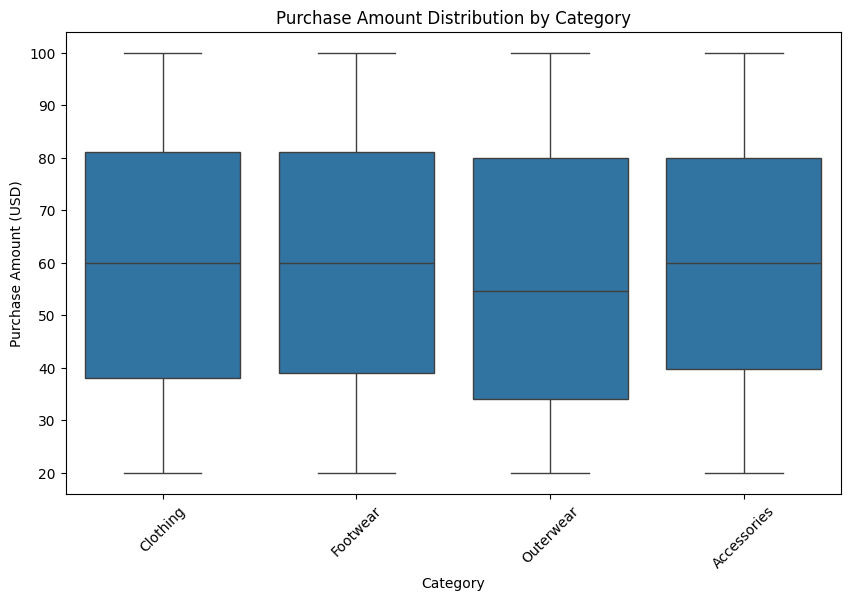

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount Distribution by Category')
plt.xticks(rotation=45)
plt.show()


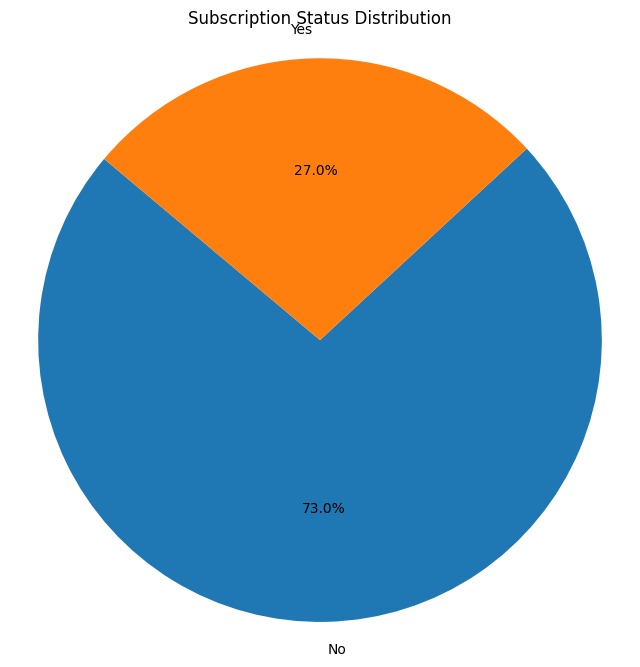

In [17]:
subscription_counts = df['Subscription Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Status Distribution')
plt.axis('equal')
plt.show()

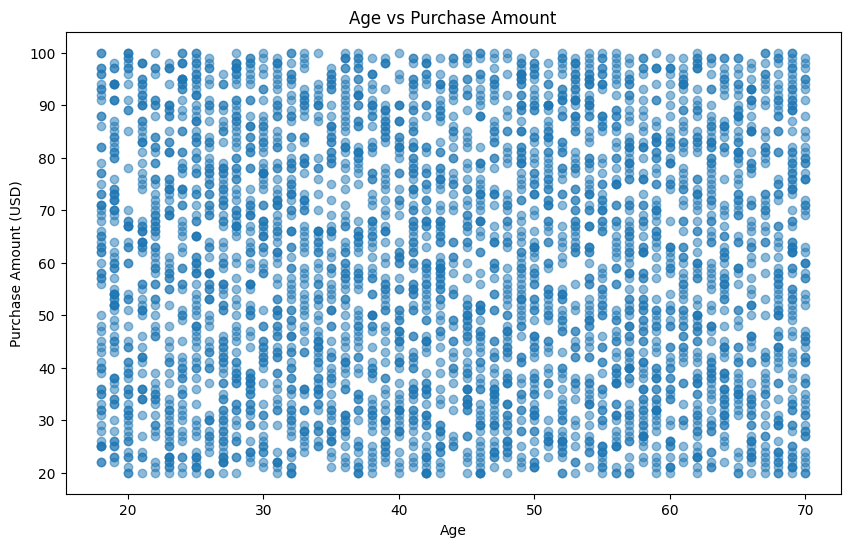

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.5)
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

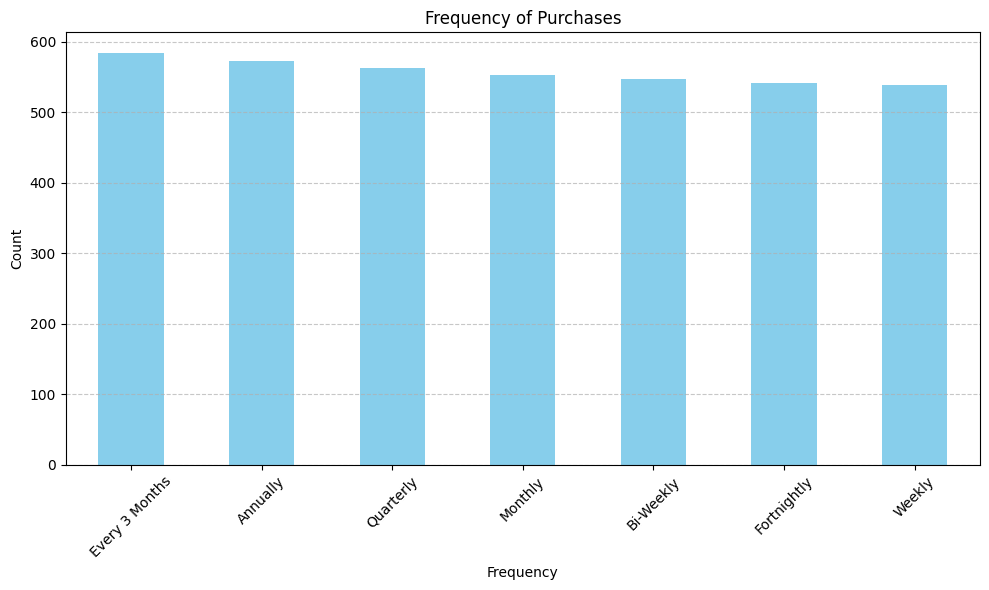

In [19]:


# Count the frequency of purchases
purchase_frequency = df['Frequency of Purchases'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
purchase_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Purchases')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Payment Method','Discount Applied','Promo Code Used','Frequency of Purchases']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])




In [21]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Purchase Amount (USD)']) 
y = df['Purchase Amount (USD)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
X

,Customer ID,Age,Gender,Item Purchased,Category,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,1,21,1,2.7,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,0,21,2,4.2,0,0,0,0,32,5,6
3896,3897,52,0,0,0,0,23,1,4.5,0,5,0,0,41,0,1
3897,3898,46,0,1,0,0,8,1,2.9,0,4,0,0,24,5,5
3898,3899,44,0,17,2,2,3,2,3.8,0,1,0,0,24,5,6


In [23]:
y


0       53
1       64
2       73
3       90
4       49
        ..
3895    28
3896    49
3897    33
3898    77
3899    81
Name: Purchase Amount (USD), Length: 3900, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=4000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize AdaBoost classifier
logistic = LogisticRegression( random_state=100)

# Train the model
logistic.fit(X_train, y_train)

# Make predictions
y_pred =logistic.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))





Accuracy: 0.93375
Accuracy: 0.93375
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       401
           1       0.93      0.94      0.93       399

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.98625
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       401
           1       0.98      0.99      0.99       399

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=3000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=100)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.92


In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Generate sample data
X, y = make_classification(n_samples=3000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize parameters for XGBoost ensemble
num_rounds = 50
learning_rate = 0.01  # Adjusted learning rate
ensemble_size = 10
predictions = np.zeros((len(y_test), 2))  # Initialize array for storing class probabilities

for i in range(ensemble_size):
    # Create and train the XGBoost model
    xgb_classifier = xgb.XGBClassifier(n_estimators=num_rounds, learning_rate=learning_rate, random_state=100)
    xgb_classifier.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    y_pred_proba = xgb_classifier.predict_proba(X_test)
    
    # Accumulate predictions
    predictions += (1.0 / ensemble_size) * y_pred_proba

# Convert predicted probabilities to binary predictions
y_pred_ensemble = np.argmax(predictions, axis=1)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy:", accuracy_ensemble)


Ensemble Accuracy: 0.92


In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=3000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=100)

# Train the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9166666666666666


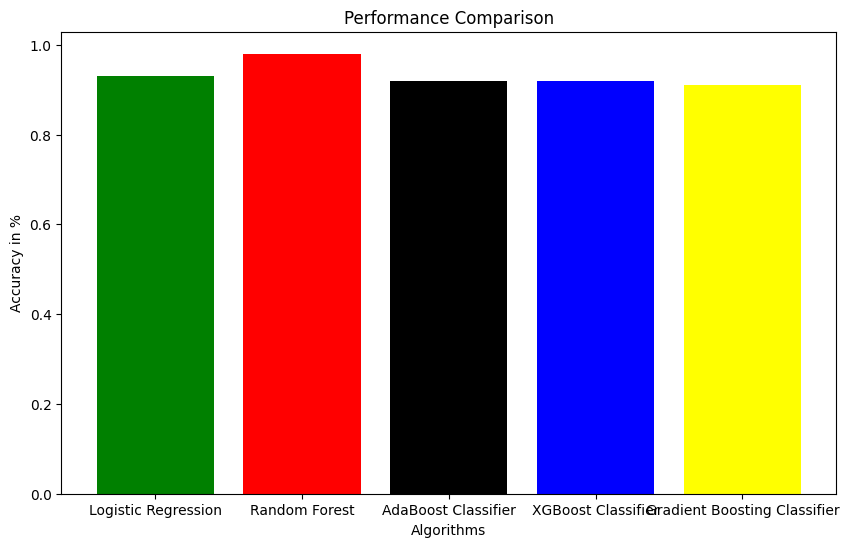

In [30]:
from matplotlib import pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [0.93, 0.98, 0.92, 0.92, 0.91]

# labels for bars
tick_label = ['Logistic Regression', 'Random Forest', 'AdaBoost Classifier', 'XGBoost Classifier', 'Gradient Boosting Classifier']

# plotting a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(left, height, tick_label=tick_label, width=0.8, color=['green', 'red', 'black', 'blue', 'yellow'])

# naming the x-axis
plt.xlabel('Algorithms')

# naming the y-axis
plt.ylabel('Accuracy in %')

# plot title
plt.title('Performance Comparison')

# function to show the plot
plt.show()


In [31]:
filename = 'customer_model.pkl'
pickle.dump(adaboost_classifier, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))



